1- Packages

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from data import load_dataset
%matplotlib inline


2- Overview of the Problem set

- Dữ liệu cho gồm 2 file gồm train và test để nhận biết con mèo được lưu ở dạng nhị phân

- Dữ liệu mỗi bức ảnh được lưu ở dạng RGB với kích thước (64,64,3)

In [253]:
def load_dataset():
    train_dataset=h5py.File("train_catvnoncat.h5","r")
    train_set_x_orig=np.array(train_dataset["train_set_x"][:]) # Lấy ra tập x train shape (209,64,64,3)
    train_set_y_orig=np.array(train_dataset["train_set_y"][:]) # Lấy ra tập y train shape (209,)
    
    test_dataset=h5py.File("test_catvnoncat.h5","r")
    test_set_x_orig=np.array(test_dataset["test_set_x"][:]) # Lấy ra tập x test shape (50,64,64,3)
    test_set_y_orig=np.array(test_dataset["test_set_y"][:]) # Lấy ra tập y test shape (50,)

    classes=np.array(test_dataset["list_classes"][:]) # Lấy ra các lớp đối tượng

    train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0])) # reshape thành (1,209)
    test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0])) # reshape thành (1,50)
    return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes


In [254]:
# Load dữ liệu
train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes=load_dataset()
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)

(50, 64, 64, 3)
(1, 50)


y=0


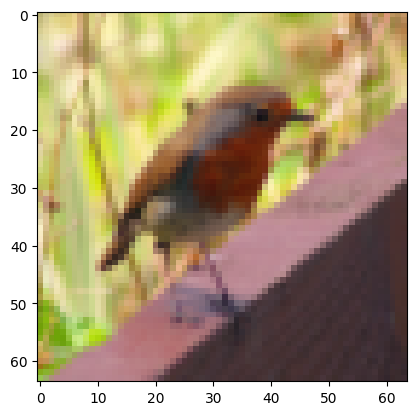

In [255]:
# Lấy ra 1 bức ảnh
index=10
plt.imshow(train_set_x_orig[index])
print("y="+str(train_set_y_orig[0][index]))

In [256]:
m_train=train_set_x_orig.shape[0] # Lấy ra số ví dụ huấn luyện 209
m_test=test_set_x_orig.shape[0] # Lấy ra số ví dụ test
num_px=train_set_x_orig.shape[1] # Lấy ra hình dạng của 1 bức ảnh
test_set_x_orig.shape

print("Số lượng ví dụ huấn luyện:",m_train)
print("Số lượng ví dụ test:",m_test)
print("Độ rộng khung ảnh:",num_px)
print("Mỗi bức ảnh có kích thước:","(",num_px,num_px,3,")")
print("Kích thước tập x train",train_set_x_orig.shape)
print("Kích thước tập y train",train_set_y_orig.shape)
print("Kích thước tập y test",test_set_x_orig.shape)
print("Kích thước tập y test",test_set_y_orig.shape)

Số lượng ví dụ huấn luyện: 209
Số lượng ví dụ test: 50
Độ rộng khung ảnh: 64
Mỗi bức ảnh có kích thước: ( 64 64 3 )
Kích thước tập x train (209, 64, 64, 3)
Kích thước tập y train (1, 209)
Kích thước tập y test (50, 64, 64, 3)
Kích thước tập y test (1, 50)


Làm phẳng dữ liệu đầu vào

In [257]:
train_set_x_flatten=train_set_x_orig.reshape(num_px*num_px*3,-1)
test_set_x_flatten=test_set_x_orig.reshape(num_px*num_px*3,-1)

print("Kích thước x train sau khi làm phẳng",train_set_x_flatten.shape)
print("Kích thước y train sau khi làm phẳng",train_set_y_orig.shape)
print("Kích thước x test sau khi làm phẳng",test_set_x_flatten.shape)
print("Kích thước y test sau khi làm phẳng",test_set_y_orig.shape)

Kích thước x train sau khi làm phẳng (12288, 209)
Kích thước y train sau khi làm phẳng (1, 209)
Kích thước x test sau khi làm phẳng (12288, 50)
Kích thước y test sau khi làm phẳng (1, 50)


Tạo bước preprocessing bằng cách chia các pixel cho 255

In [258]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255
train_set_y=train_set_y_orig
test_set_y=test_set_y_orig

Xây dựng hàm sigmoid

In [259]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

Quá trình Forward và Backward

In [260]:
def propagate(w,b,X,Y):
    """
    w -- trọng số 1 lớp đầu vào của Logistic Regression shape: (num_px*num_px*3,1)
    b -- bias
    X -- tập huấn luyện train có shape là train_set_x.shape
    Y -- nhãn dữ liệu phân biệt mèo có shape train_set_y.shape
    m -- số lượng mẫu tập huấn luyện
    Trả về:
    cost -- hàm chi phí
    dw -- gradient của w với shape giống shape của w
    db -- gradient của b với shape giống shape của b
    """
    # Forward
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost=np.sum((-np.log(A)*Y-np.log(1-A)*(1-Y)))/m
    # Backward
    dw=(np.dot(X,(A-Y).T))/m
    db=(np.sum(A-Y))/m

    cost=np.squeeze(cost)
    grads={"dw":dw,
           "db":db}
    return grads,cost


In [261]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
w=np.random.rand(12288,1)/100000
b=10.
w,b,X,Y=w,b,train_set_x,train_set_y
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.10182248]
 [0.11116634]
 [0.11602594]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
db = 0.6554581082242388
cost = 6.571350990329802


Tối ưu

In [262]:
def optimize(w,b,X,Y,num_iterations,learning_rate):
    """
    w -- trọng số 1 lớp đầu vào của Logistic Regression shape: (num_px*num_px*3,1)
    b -- bias
    X -- tập huấn luyện train có shape là train_set_x.shape
    Y -- nhãn dữ liệu phân biệt mèo có shape train_set_y.shape
    num_iterations -- số lượng vòng lặp cho việc tối ưu
    learning_rate -- tốc độ học
    """
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)

        dw=grads["dw"]
        db=grads["db"]

        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)

        if i%5==0:
            costs.append(cost)

        params={"w":w,
                "b":b}
        grads={"dw":dw,
               "db":db}
    return params,grads,costs

[6.5713491083105025, 0.6589796992283236, 1.0186450523511035, 0.7749029513565423, 0.9528102164556466, 0.7656808616794629, 0.9238317454910974, 0.7556812565030524, 0.9003948315526614, 0.7469912693517247, 0.8818608005605287, 0.7391314764085879, 0.8665450666579977, 0.7318862308990104, 0.8533160653450553, 0.7251063140867074, 0.8414574582796464, 0.7186856572555738, 0.8305280596450759, 0.7125492950598428]


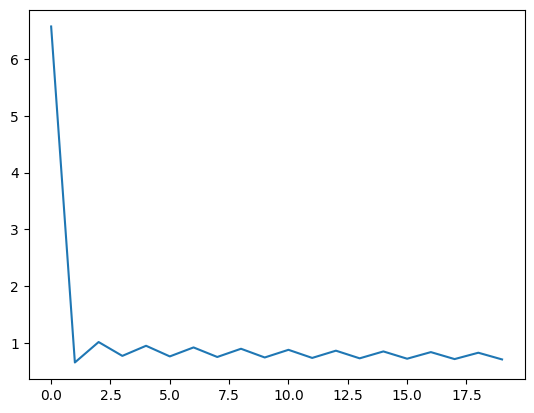

In [263]:
w=np.random.rand(12288,1)/100000
b=10.
w,b,X,Y=w,b,train_set_x,train_set_y
params,grads,costs=optimize(w,b,X,Y,num_iterations=100,learning_rate=0.005)
print(costs)
plt.plot(costs)

Dự đoán mô hình

In [264]:
def predict(w,b,X):
    """
    w -- trọng số 1 lớp đầu vào của Logistic Regression shape: (num_px*num_px*3,1)
    b -- bias
    X -- tập dữ liệu dự đoán
    Trả về
    Y_prediction -- một mảng numpy
    """
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    #w=w.reshape(X.shape[0],1)
    
    A=sigmoid(np.dot(w.T,X)+b)
    Y_prediction=(A>=0.5)*1.0
    return Y_prediction

Ghép các bước

In [265]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.05):
    w=np.random.rand(12288,1)/100000
    b=10.
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)

    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d={"costs":costs,
       "Y_prediction_test":Y_prediction_test,
       "Y_prediction_train":Y_prediction_train,
       "w":w,
       "b":b,
       "learning_rate":learning_rate,
       "num_iterations":num_iterations}
    return d

In [266]:
d=model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=2000,learning_rate=0.05)

/var/folders/d2/r609qzln2m3g0yqb_y6gftg00000gp/T/ipykernel_1081/3879993758.py:16: RuntimeWarning: divide by zero encountered in log
  cost=np.sum((-np.log(A)*Y-np.log(1-A)*(1-Y)))/m
/var/folders/d2/r609qzln2m3g0yqb_y6gftg00000gp/T/ipykernel_1081/3879993758.py:16: RuntimeWarning: invalid value encountered in multiply
  cost=np.sum((-np.log(A)*Y-np.log(1-A)*(1-Y)))/m


train accuracy: 72.2488038277512 %
test accuracy: 64.0 %


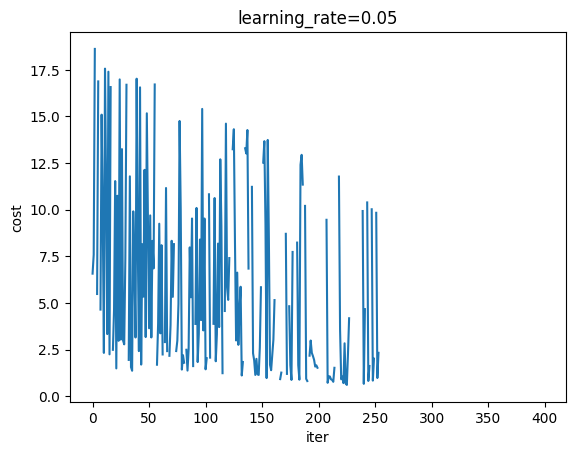

In [273]:
costs=d['costs']
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iter")
plt.title("learning_rate="+str(d["learning_rate"]))
plt.show()